In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
random.seed(0)
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.exceptions import UndefinedMetricWarning
import warnings


In [33]:
df = pd.read_csv('Water_potability.csv')
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [34]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [35]:
# count the number of missing values in each row
missing_values_count = df.isnull().sum(axis=1)

# identify rows with more than two missing values
condition = missing_values_count > 2
rows_with_more_than_two_missing_values = df[condition]

# calculate the number of rows with more than two missing values
num_rows_with_more_than_two_missing_values = condition.sum()

# print the result
print(f"There are {num_rows_with_more_than_two_missing_values} rows with more than two missing values:\n")
print(rows_with_more_than_two_missing_values)

# drop the rows with more than two missing values
df = df.drop(rows_with_more_than_two_missing_values.index)

# confirm the rows have been removed
print(f"\n{num_rows_with_more_than_two_missing_values} rows have been removed. The new DataFrame has {len(df)} rows.")

There are 9 rows with more than two missing values:

      ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
141  NaN  167.386127  20944.620814     4.963124      NaN    566.339294   
201  NaN  229.771350  16162.262307     4.933662      NaN    448.846036   
387  NaN  143.300200  16263.167465     6.229737      NaN    503.664085   
646  NaN  221.620058  11954.700730     6.657053      NaN    391.238714   
929  NaN  202.079864  12519.090660     7.627524      NaN    399.883388   
992  NaN  226.765646  39942.953898     8.594715      NaN    538.621803   
2065 NaN  184.993731  19764.627445     7.505092      NaN    293.477998   
3062 NaN  209.531697  44982.734155     8.898024      NaN    349.385235   
3067 NaN  193.091260  17777.100086     6.087949      NaN    543.114953   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
141        11.318807              NaN   3.679795           0  
201         8.816487              NaN   4.600928           0  
387        19.585

In [36]:
# checking for missing values
df.isnull().sum()

# filling missing values with mean of respective columns
df = df.fillna(df.mean())

# checking the data types of columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [37]:
# checking for missing values again
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [38]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075905,-0.082068,-0.031845,0.014403,0.017223,0.040110,0.002994,-0.036250,-0.003290
Hardness,0.075905,1.000000,-0.047814,-0.030674,-0.092854,-0.023414,0.004719,-0.012702,-0.015414,-0.012768
Solids,-0.082068,-0.047814,1.000000,-0.072385,-0.150178,0.013918,0.009512,-0.008895,0.018824,0.034327
Chloramines,-0.031845,-0.030674,-0.072385,1.000000,0.023816,-0.019203,-0.013751,0.016644,0.002106,0.023779
Sulfate,0.014403,-0.092854,-0.150178,0.023816,1.000000,-0.014085,0.026942,-0.025605,-0.009798,-0.020640
Conductivity,0.017223,-0.023414,0.013918,-0.019203,-0.014085,1.000000,0.021542,0.001257,0.004976,-0.008150
Organic_carbon,0.040110,0.004719,0.009512,-0.013751,0.026942,0.021542,1.000000,-0.012992,-0.026861,-0.031821
Trihalomethanes,0.002994,-0.012702,-0.008895,0.016644,-0.025605,0.001257,-0.012992,1.000000,-0.021519,0.006967
Turbidity,-0.036250,-0.015414,0.018824,0.002106,-0.009798,0.004976,-0.026861,-0.021519,1.000000,0.001792
Potability,-0.003290,-0.012768,0.034327,0.023779,-0.020640,-0.008150,-0.031821,0.006967,0.001792,1.000000


(10.0, 0.0)

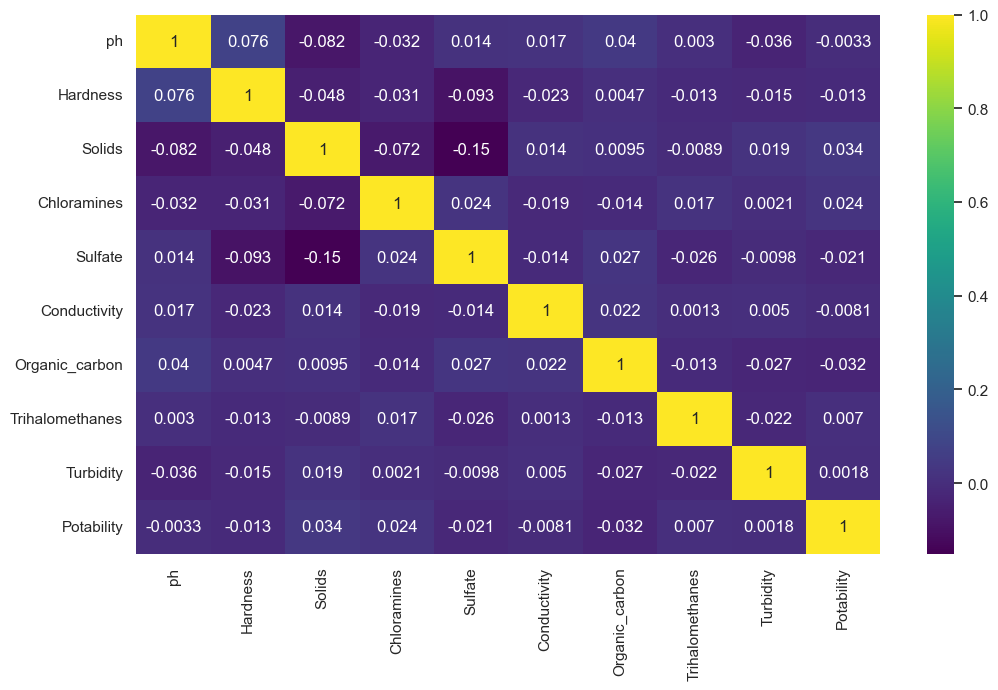

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

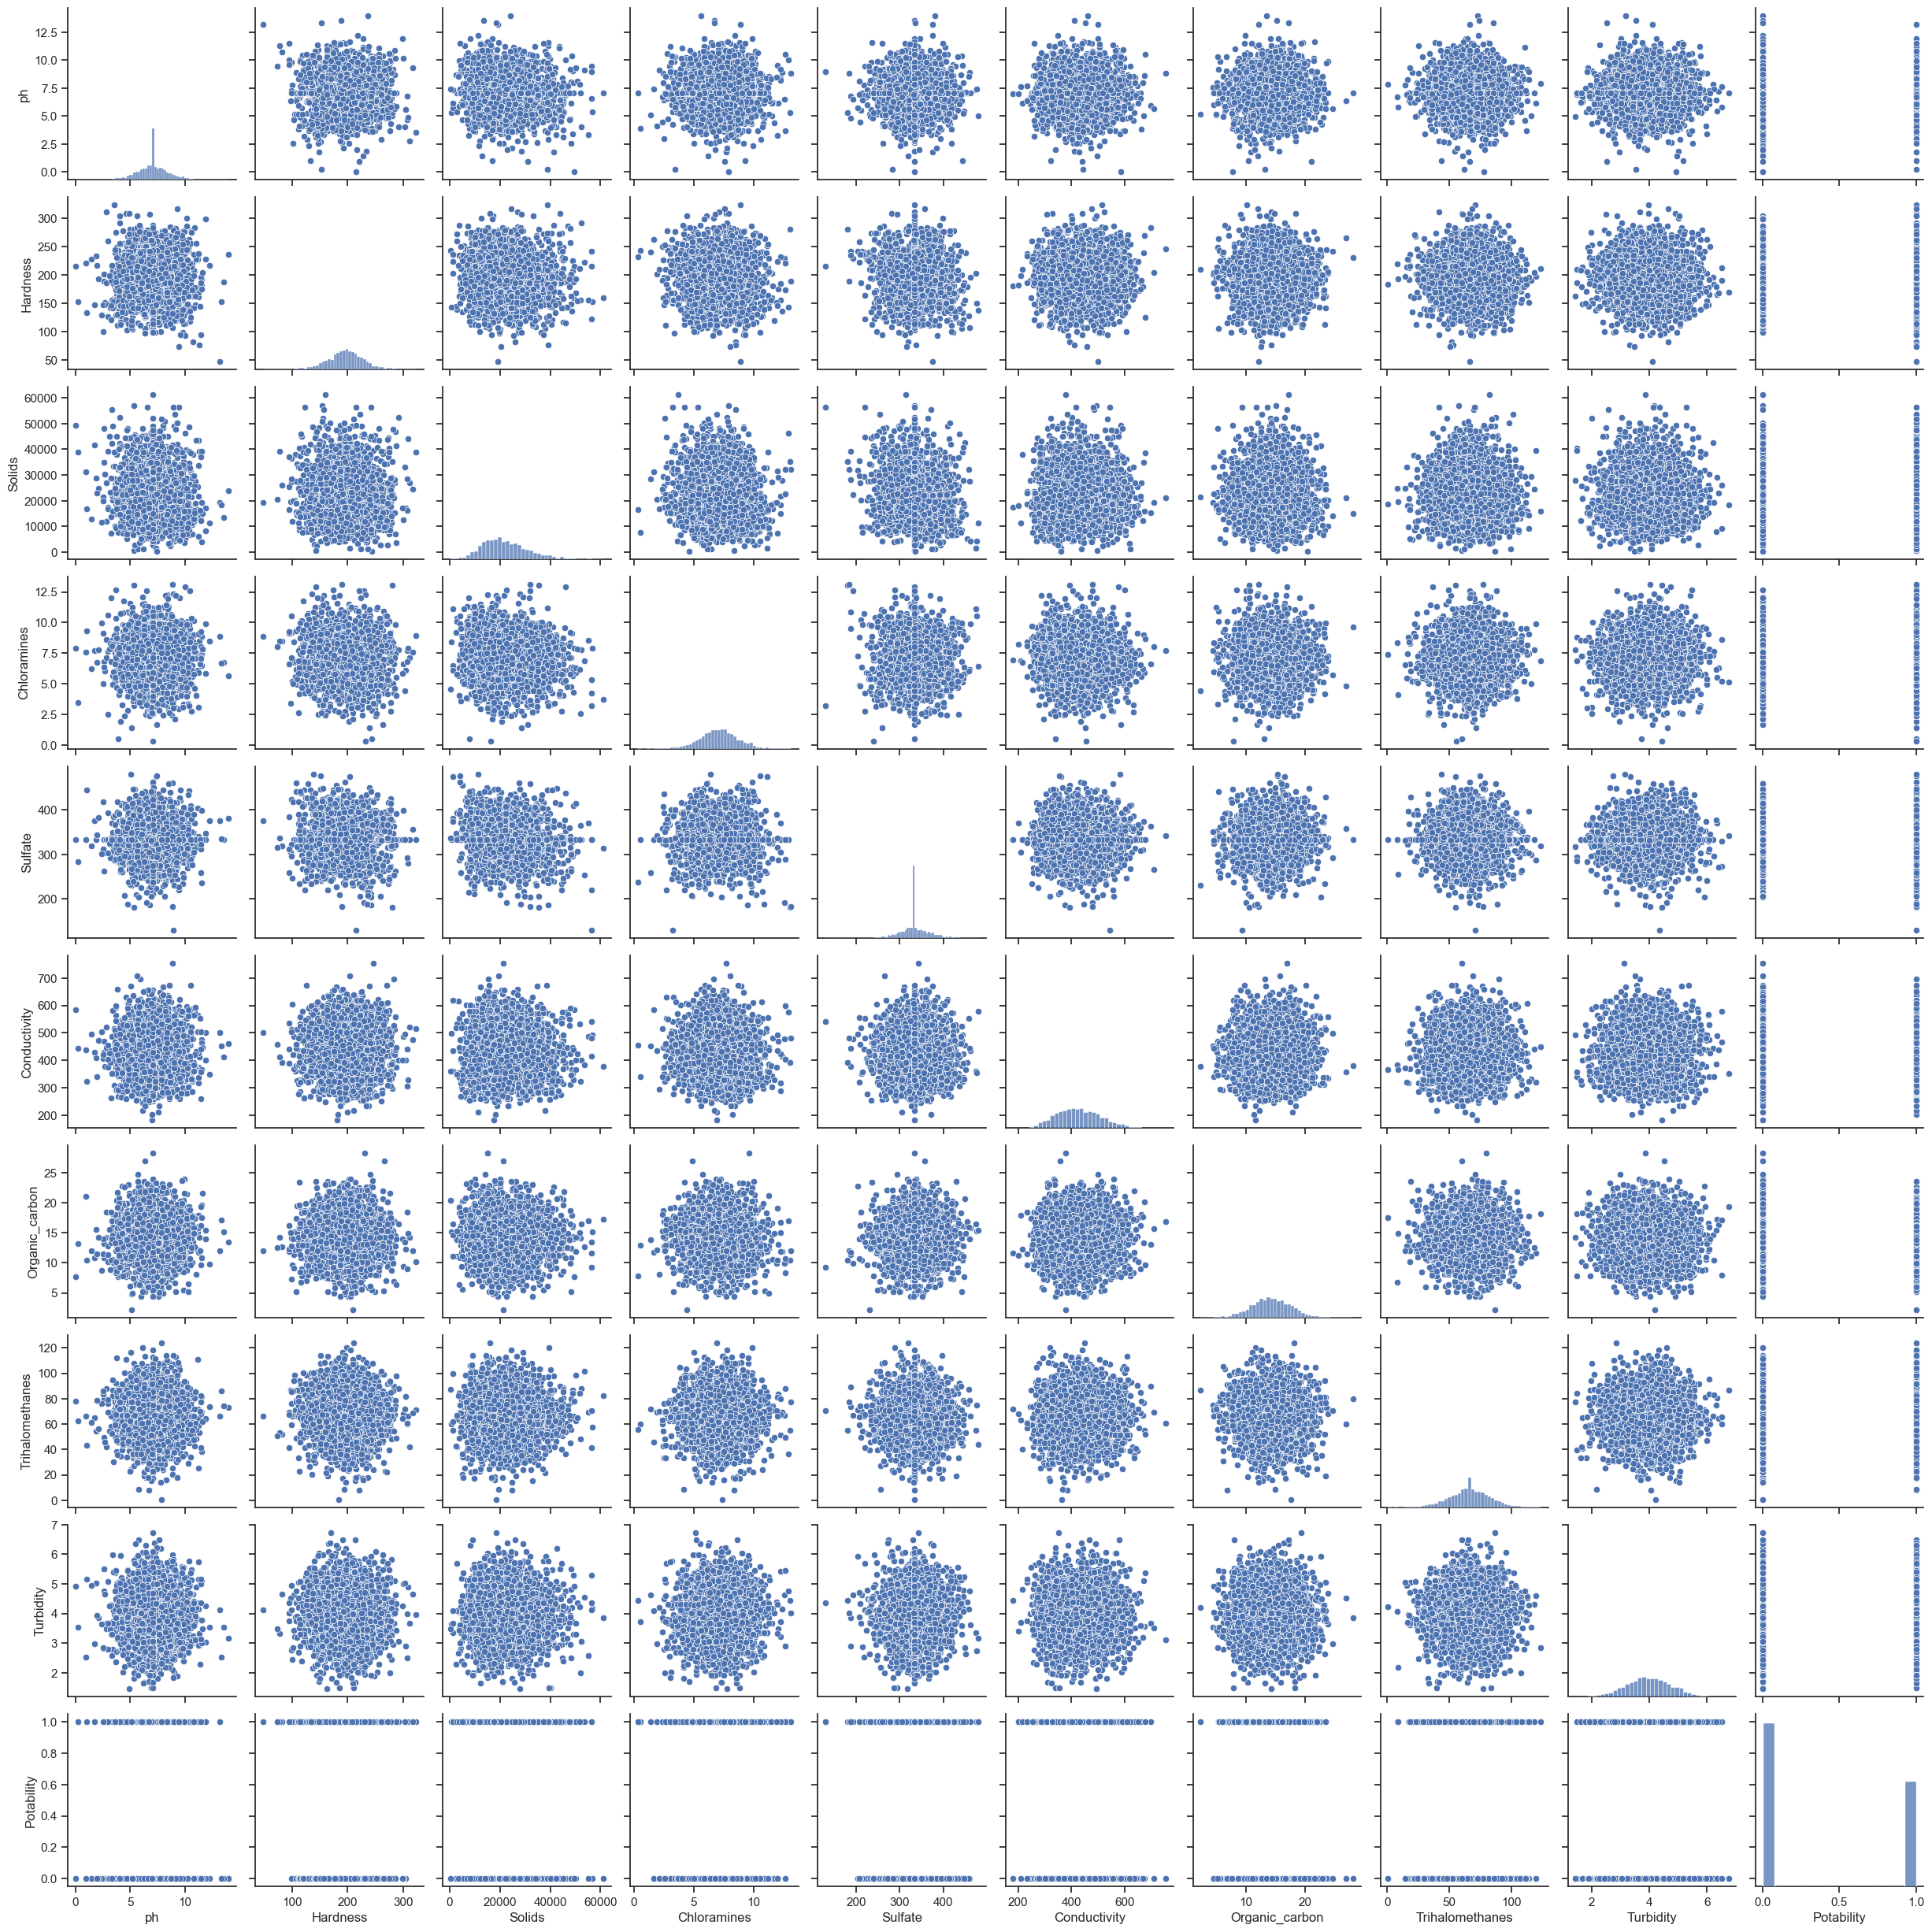

In [40]:
corr_matrix = df.corr()

sns.set(style='ticks')
sns.pairplot(data=df, vars=corr_matrix.columns)
plt.show()

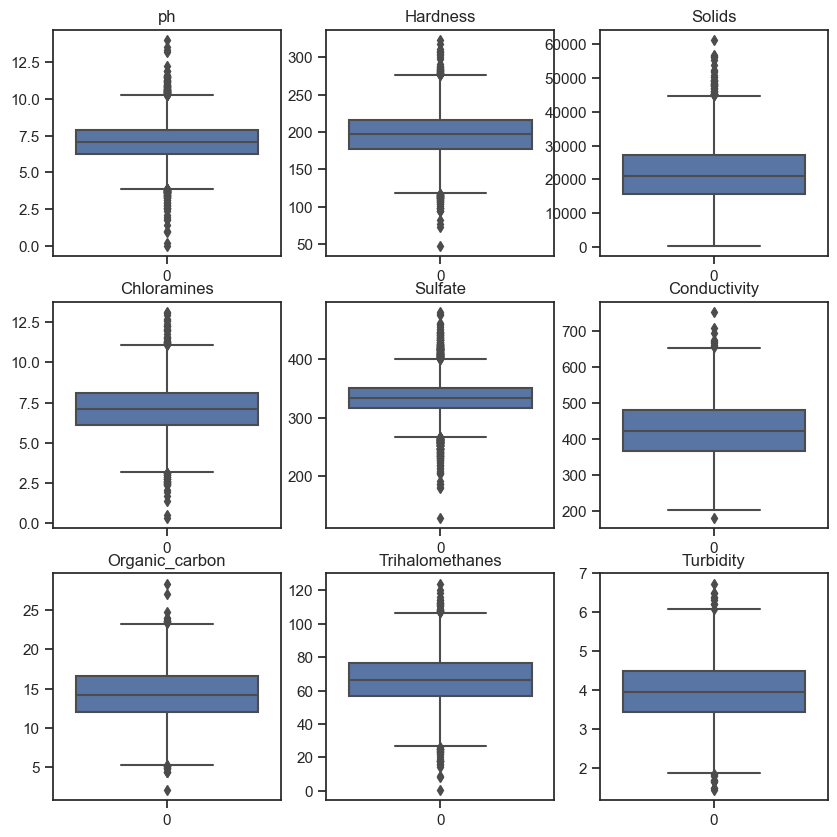

In [41]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1).set_title(i)
    sns.boxplot(data = df[i])
plt.show()

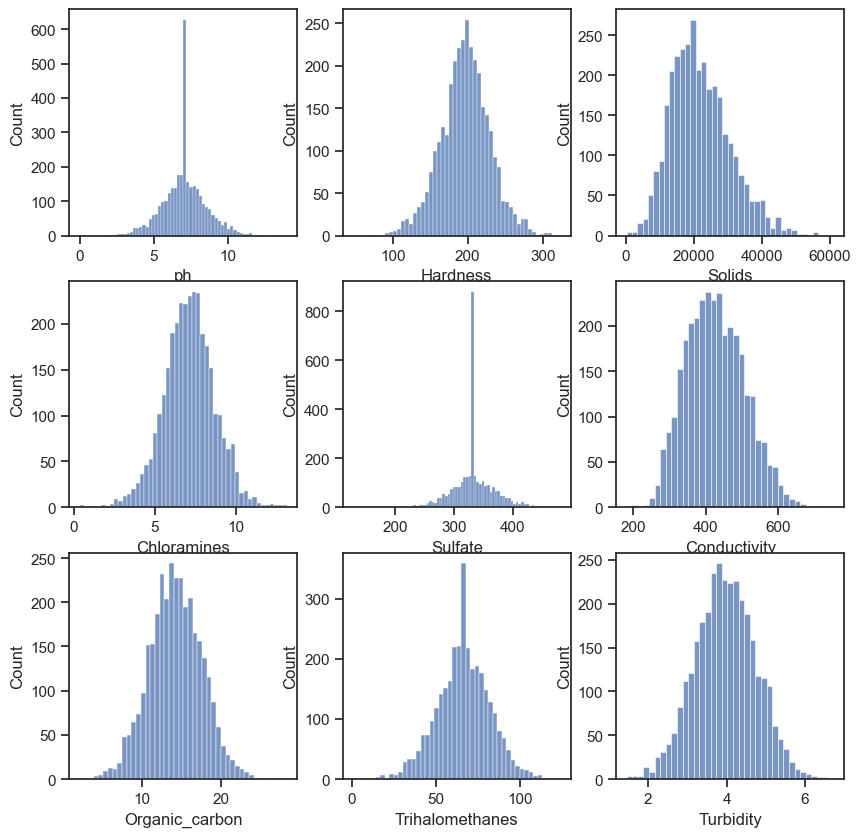

In [42]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1)
    sns.histplot(data = df[i])
plt.show()

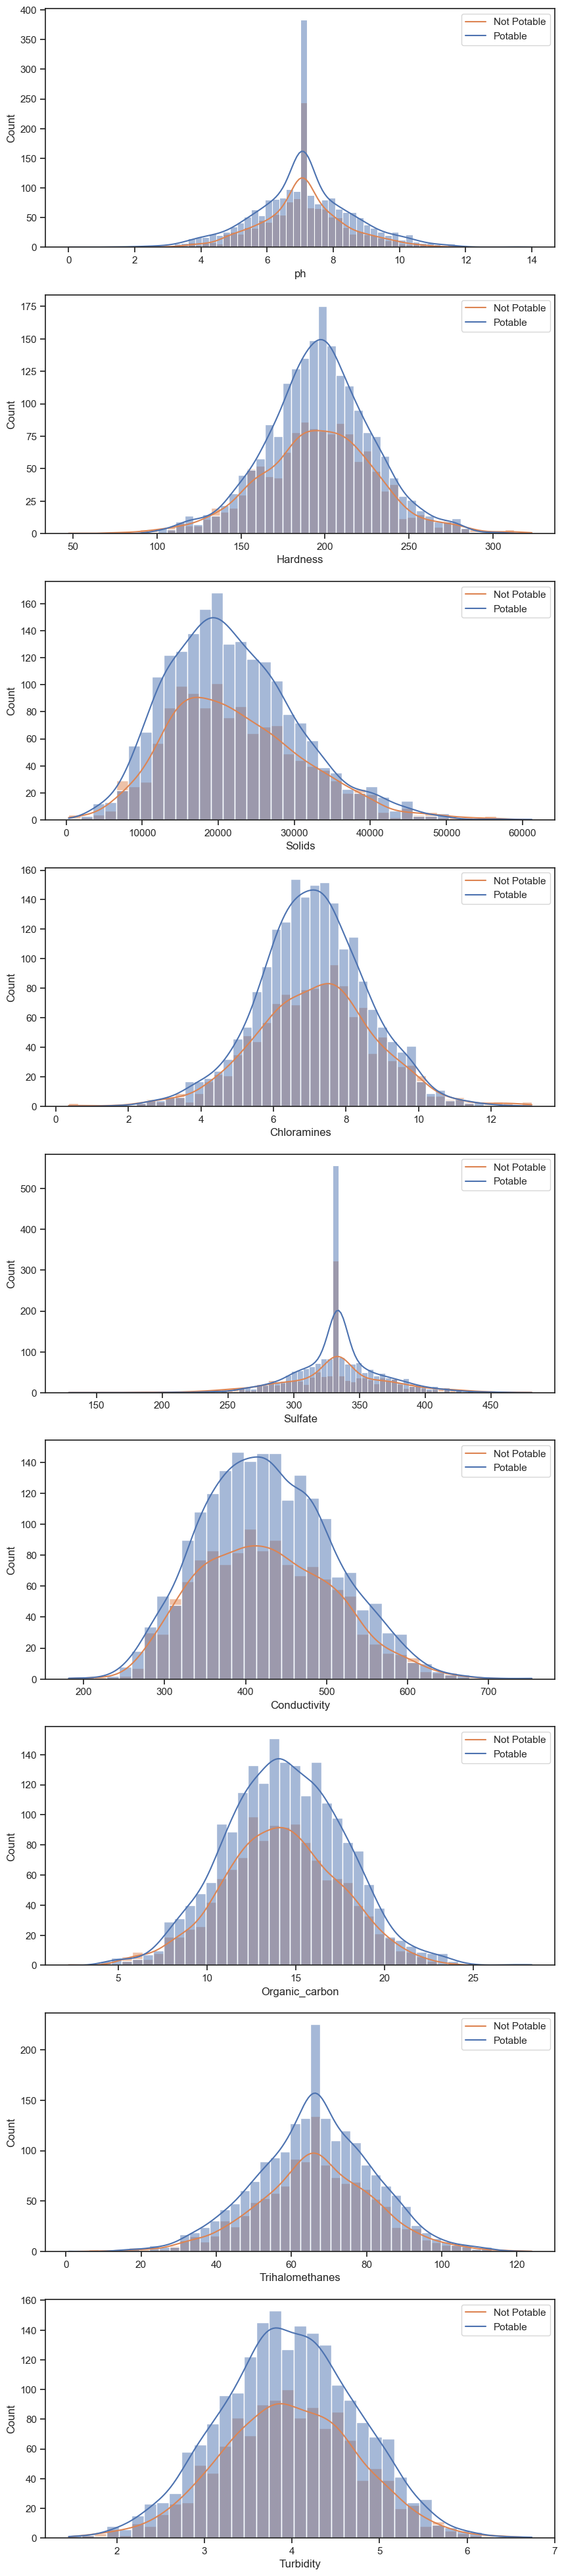

In [43]:
# Select the columns to visualize
columns_to_visualize = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(10,50))

# Loop through each column and create a distribution plot
for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=df, x=column, hue='Potability', kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(['Not Potable', 'Potable'])

plt.show()

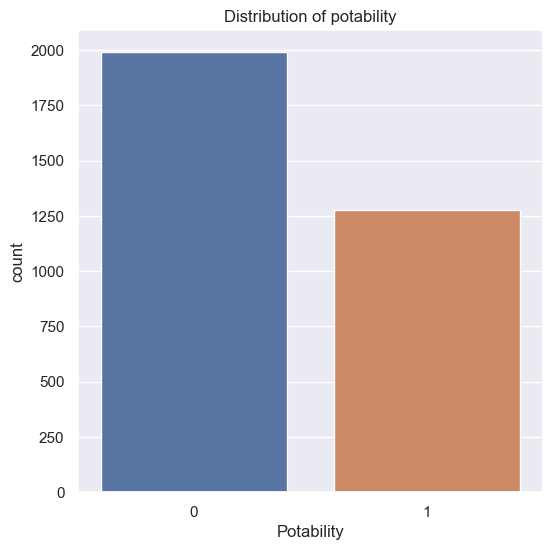

Epoch 1/10


C:\Users\linda\AppData\Local\Temp\ipykernel_26540\1609697470.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


55/55 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6022
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6102
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6131
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6125
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6171
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6171
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6217
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6217
Epoch 9/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6217
Epoch 10/10
28/28 [==============================] - 0s 1ms/step
Epoch 1/10
55/55 [==============================] - 1s 2ms/step 

28/28 [==============================] - 0s 1ms/step
Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5597
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5982
Epoch 3/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6206
Epoch 4/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6315
Epoch 5/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6361
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6332
Epoch 7/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6401
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6389
Epoch 9/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6458
Epoch 10/10
28/28 [==============================] - 0s 1ms/step


55/55 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7072
Epoch 10/10
28/28 [==============================] - 0s 1ms/step
Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.6823 - accuracy: 0.5855
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6073
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6343
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6418
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6435
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6561
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6665
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6670
Epoch 9/10
55/55 [==============================] - 0s 2ms/step 

55/55 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6349
Epoch 9/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6389
Epoch 10/10
28/28 [==============================] - 0s 1ms/step
Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.5792
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6056
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6303
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6705
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6745
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7009
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7032
Epoch 8/10
55/55 [==============================] - 0s 2ms/step 

55/55 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6142
Epoch 9/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6200
Epoch 10/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6217
Epoch 11/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6223
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6303
Epoch 13/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6309
Epoch 14/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6320
Epoch 15/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.6309
Epoch 16/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6349
Epoch 17/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.6406
Epoch 18/20
55/55 [====

55/55 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.6808
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6831
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.6940
Epoch 12/20
55/55 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6935
Epoch 13/20
55/55 [==============================] - 0s 1ms/step - loss: 0.5951 - accuracy: 0.6975
Epoch 14/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7009
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7032
Epoch 16/20
55/55 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7015
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7055
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7049
Epoch 19/20
55/55 [===

55/55 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.5999
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6005
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6010
Epoch 13/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6016
Epoch 14/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6028
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6051
Epoch 16/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6062
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6073
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6091
Epoch 19/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6142
Epoch 20/20
28/28 [===

55/55 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6510
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6550
Epoch 13/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.6619
Epoch 14/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6653
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6699
Epoch 16/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6716
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6693
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6762
Epoch 19/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6797
Epoch 20/20
28/28 [==============================] - 0s 1ms/step
Epoch 1/20
55/55 [==============================] - 1s 2

55/55 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6033
Epoch 13/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5999
Epoch 14/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6039
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6016
Epoch 16/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6062
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6073
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6051
Epoch 19/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6137
Epoch 20/20
28/28 [==============================] - 0s 1ms/step
Epoch 1/20
55/55 [==============================] - 1s 2ms/step - loss: 0.8817 - accuracy: 0.4064
Epoch 2/20
55/55 [==============================] - 0s 2m

55/55 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6820
Epoch 14/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.6825
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6929
Epoch 16/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6935
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.6958
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.6980
Epoch 19/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6980
Epoch 20/20
28/28 [==============================] - 0s 1ms/step
Epoch 1/20
55/55 [==============================] - 1s 2ms/step - loss: 0.7096 - accuracy: 0.4920
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5890
Epoch 3/20
55/55 [==============================] - 0s 2ms

55/55 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7158
Epoch 15/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7118
Epoch 16/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7084
Epoch 17/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7233
Epoch 18/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7239
Epoch 19/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7193
Epoch 20/20
28/28 [==============================] - 0s 1ms/step
Epoch 1/30
55/55 [==============================] - 1s 2ms/step - loss: 0.7366 - accuracy: 0.5591
Epoch 2/30
55/55 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5637
Epoch 3/30
55/55 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5672
Epoch 4/30
55/55 [==============================] - 0s 1ms/

55/55 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6045
Epoch 16/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6045
Epoch 17/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6062
Epoch 18/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6085
Epoch 19/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6079
Epoch 20/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6125
Epoch 21/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.6142
Epoch 22/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6148
Epoch 23/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6194
Epoch 24/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6177
Epoch 25/30
55/55 [===

55/55 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6096
Epoch 7/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6177
Epoch 8/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6211
Epoch 9/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6257
Epoch 10/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6297
Epoch 11/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6361
Epoch 12/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6424
Epoch 13/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6470
Epoch 14/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6533
Epoch 15/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6550
Epoch 16/30
55/55 [======

55/55 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.6975
Epoch 29/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.6975
Epoch 30/30
28/28 [==============================] - 0s 1ms/step
Epoch 1/30
55/55 [==============================] - 1s 1ms/step - loss: 0.7039 - accuracy: 0.5258
Epoch 2/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5907
Epoch 3/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.6079
Epoch 4/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6148
Epoch 5/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6194
Epoch 6/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6240
Epoch 7/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6309
Epoch 8/30
55/55 [==============================] - 0s 1ms/step

55/55 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6355
Epoch 20/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6372
Epoch 21/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6395
Epoch 22/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6435
Epoch 23/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6487
Epoch 24/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6464
Epoch 25/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6447
Epoch 26/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6515
Epoch 27/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6498
Epoch 28/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.6561
Epoch 29/30
55/55 [===

55/55 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6338
Epoch 11/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6441
Epoch 12/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6642
Epoch 13/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6693
Epoch 14/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6728
Epoch 15/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6780
Epoch 16/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6780
Epoch 17/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6820
Epoch 18/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.6848
Epoch 19/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6923
Epoch 20/30
55/55 [===

55/55 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5540
Epoch 2/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6177
Epoch 3/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6412
Epoch 4/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6573
Epoch 5/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6688
Epoch 6/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6780
Epoch 7/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.6814
Epoch 8/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6912
Epoch 9/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.6980
Epoch 10/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6963
Epoch 11/30
55/55 [===========

55/55 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6682
Epoch 24/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6630
Epoch 25/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6711
Epoch 26/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6757
Epoch 27/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6751
Epoch 28/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.6803
Epoch 29/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6831
Epoch 30/30
28/28 [==============================] - 0s 1ms/step
Epoch 1/30
55/55 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.5568
Epoch 2/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5758
Epoch 3/30
55/55 [==============================] - 0s 2ms

55/55 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6831
Epoch 15/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.6831
Epoch 16/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.6889
Epoch 17/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.6935
Epoch 18/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6998
Epoch 19/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7009
Epoch 20/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7032
Epoch 21/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7055
Epoch 22/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7130
Epoch 23/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7113
Epoch 24/30
55/55 [===

55/55 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6613
Epoch 6/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.6900
Epoch 7/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7061
Epoch 8/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7038
Epoch 9/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7130
Epoch 10/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7216
Epoch 11/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7210
Epoch 12/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7273
Epoch 13/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7268
Epoch 14/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7296
Epoch 15/30
55/55 [=======

55/55 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7549
Epoch 28/30
55/55 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7468
Epoch 29/30
55/55 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7583
Epoch 30/30
28/28 [==============================] - 0s 1ms/step
Epoch 1/20
82/82 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.5848
Epoch 2/20
82/82 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6272
Epoch 3/20
82/82 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6357
Epoch 4/20
82/82 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6582
Epoch 5/20
82/82 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.6747
Epoch 6/20
82/82 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6774
Epoch 7/20
82/82 [==============================] - 0s 2ms/ste

In [44]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Potability'])
plt.title('Distribution of potability')
plt.show()

# Load and preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
val_split = 0.2
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y, test_size=val_split, random_state=42)

# Define the model architecture
def create_model(num_hidden_layers=1, num_neurons=16):
    model = Sequential()
    for i in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model inside a scikit-learn estimator
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to search
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [8, 16, 32],
    'epochs': [10, 20, 30]
}

# Define the custom scoring function
custom_scorer = make_scorer(accuracy_score, greater_is_better=True)

# Use GridSearchCV to search for the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=custom_scorer)
grid_result = grid.fit(X_train_scaled, y_train)

best_params = grid_result.best_params_
print(f"Best parameters: {best_params}")

# Train the best model and evaluate on the validation set
best_model = create_model(num_hidden_layers=best_params['num_hidden_layers'], num_neurons=best_params['num_neurons'])
best_model.fit(X_train_scaled, y_train, epochs=best_params['epochs'])
accuracy = best_model.evaluate(X_val_scaled, y_val)[1]
print(f"Validation accuracy: {accuracy}")

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
72/72 [==============================] - 1s 2ms/step - loss: 0.6637 - accuracy: 0.6054 - precision: 0.4483 - recall: 0.0437
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6277 - precision: 0.5890 - recall: 0.1557
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6675 - precision: 0.6650 - recall: 0.3001
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6509 - precision: 0.7056 - recall: 0.1825  
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6684 - precision: 0.6331 - recall: 0.3595
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6719 - precision: 0.6600 - recall: 0.3303
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6798 - precision: 0.6761 - recall: 0.3460
Epoch 8/100
72/72 [===========================

72/72 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.7852 - precision: 0.8150 - recall: 0.5823
Epoch 61/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7935 - precision: 0.8368 - recall: 0.5857
Epoch 62/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7804 - precision: 0.8319 - recall: 0.5487
Epoch 63/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7804 - precision: 0.8242 - recall: 0.5566
Epoch 64/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7857 - precision: 0.8105 - recall: 0.5890
Epoch 65/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7839 - precision: 0.8182 - recall: 0.5745
Epoch 66/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7861 - precision: 0.8166 - recall: 0.5834
Epoch 67/100
72/72 [==============================] - 

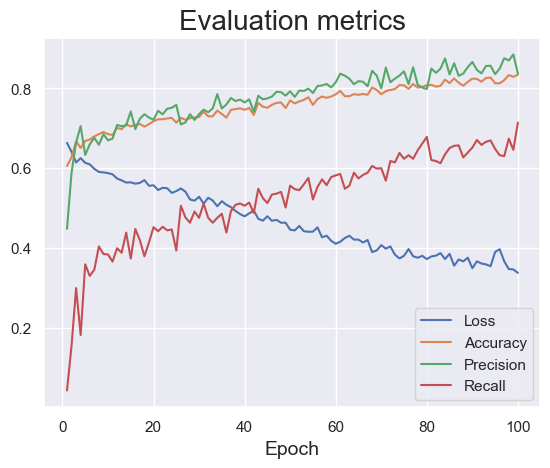

In [46]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [47]:
# feature scaling
scaler = StandardScaler()
df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']] = scaler.fit_transform(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']])

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore", category=FutureWarning)

# building the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predicting on the test set
y_pred = knn.predict(X_test)

# calculating the accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', KNN_accuracy)

Accuracy: 0.6340468909276249


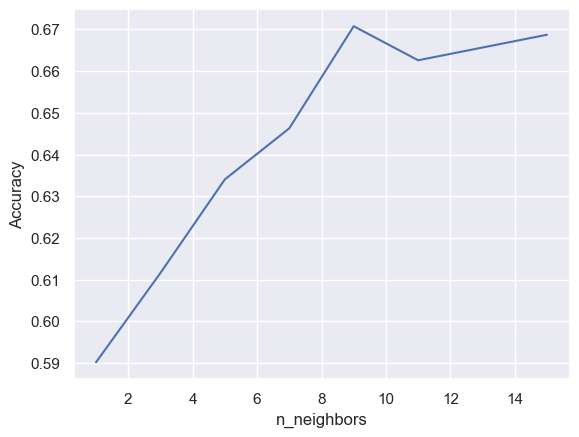

Best n_neighbors: 9
Final accuracy: 0.6707441386340469


In [49]:
# Define potential values for n_neighbors
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15]

# Create an empty list to store accuracy scores
scores = []

# Loop over potential values of n_neighbors
for n in neighbors_list:
    # Build the KNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy score for those predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list of scores
    scores.append(accuracy)

# Plot the scores against the values of n_neighbors
plt.plot(neighbors_list, scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Choose the value of n_neighbors that gives the highest accuracy score
best_n = neighbors_list[np.argmax(scores)]

# Build the final KNN model with the chosen value of n_neighbors
knn_final = KNeighborsClassifier(n_neighbors=best_n)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
print('Best n_neighbors:', best_n)
print('Final accuracy:', accuracy_final)

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the number of epochs used in training
num_epochs = 100

# Build the models
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation="relu"))
cnn_model.add(Dense(1, activation="sigmoid"))
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=num_epochs, verbose=0)

ann_model = Sequential()
ann_model.add(Dense(50, input_dim=X_train.shape[1], activation="relu"))
ann_model.add(Dense(1, activation="sigmoid"))
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
ann_history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test))

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(32, return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(16, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=num_epochs, verbose=0)


# Train the models
cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, verbose=0)
ann_model.fit(X_train, y_train, epochs=100, verbose=0)
rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, verbose=0)

# Make predictions
cnn_pred = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
ann_pred = ann_model.predict(X_test)
rnn_pred = rnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Evaluate the models
cnn_accuracy = accuracy_score(y_test, cnn_pred.round())
ann_accuracy = accuracy_score(y_test, ann_pred.round())
rnn_accuracy = accuracy_score(y_test, rnn_pred.round())

cnn_precision = precision_score(y_test, cnn_pred.round())
ann_precision = precision_score(y_test, ann_pred.round())
rnn_precision = precision_score(y_test, rnn_pred.round())

cnn_recall = recall_score(y_test, cnn_pred.round())
ann_recall = recall_score(y_test, ann_pred.round())
rnn_recall = recall_score(y_test, rnn_pred.round())

cnn_f1_score = f1_score(y_test, cnn_pred.round())
ann_f1_score = f1_score(y_test, ann_pred.round())
rnn_f1_score = f1_score(y_test, rnn_pred.round())

cnn_mse = mean_squared_error(y_test, cnn_pred.round())
ann_mse = mean_squared_error(y_test, ann_pred.round())
rnn_mse = mean_squared_error(y_test, rnn_pred.round())

# Print the evaluation metrics
print("Convolutional Neural Network:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1_score)
print("Mean Squared Error:", cnn_mse)
print("\n")

print("Artificial Neural Network:")
print("Accuracy:", ann_accuracy)
print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1 Score:", ann_f1_score)
print("Mean Squared Error:", ann_mse)
print("\n")

print("Recurrent Neural Network:")
print("Accuracy:", rnn_accuracy)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)
print("F1 Score:", rnn_f1_score)
print("Mean Squared Error:", rnn_mse)


Epoch 1/100
82/82 [==============================] - 0s 6ms/step - loss: 0.5674 - accuracy: 0.7256 - precision: 0.7527 - recall: 0.4685 - val_loss: 0.5629 - val_accuracy: 0.7339 - val_precision: 0.6939 - val_recall: 0.4416
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7539 - precision: 0.7933 - recall: 0.5210 - val_loss: 0.6278 - val_accuracy: 0.7355 - val_precision: 0.6835 - val_recall: 0.4675
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7585 - precision: 0.7969 - recall: 0.5325 - val_loss: 0.6037 - val_accuracy: 0.7416 - val_precision: 0.6890 - val_recall: 0.4892
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7608 - precision: 0.8073 - recall: 0.5287 - val_loss: 0.5971 - val_accuracy: 0.7309 - val_precision: 0.6708 - val_recall: 0.4675
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7532 - precisi

Epoch 38/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.7895 - precision: 0.8397 - recall: 0.5860 - val_loss: 0.8745 - val_accuracy: 0.6865 - val_precision: 0.5929 - val_recall: 0.3593
Epoch 39/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7799 - precision: 0.8230 - recall: 0.5736 - val_loss: 0.7827 - val_accuracy: 0.6881 - val_precision: 0.5882 - val_recall: 0.3896
Epoch 40/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7876 - precision: 0.8563 - recall: 0.5641 - val_loss: 0.7893 - val_accuracy: 0.7049 - val_precision: 0.6250 - val_recall: 0.4113
Epoch 41/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.7922 - precision: 0.8479 - recall: 0.5860 - val_loss: 0.8096 - val_accuracy: 0.6881 - val_precision: 0.5882 - val_recall: 0.3896
Epoch 42/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.7895 - pr

82/82 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.7930 - precision: 0.8786 - recall: 0.5602 - val_loss: 1.0417 - val_accuracy: 0.6881 - val_precision: 0.6098 - val_recall: 0.3247
Epoch 75/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.7937 - precision: 0.8767 - recall: 0.5641 - val_loss: 1.1169 - val_accuracy: 0.6865 - val_precision: 0.6000 - val_recall: 0.3377
Epoch 76/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.7998 - precision: 0.8851 - recall: 0.5746 - val_loss: 0.8727 - val_accuracy: 0.7018 - val_precision: 0.6233 - val_recall: 0.3939
Epoch 77/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8075 - precision: 0.8918 - recall: 0.5908 - val_loss: 1.2010 - val_accuracy: 0.6881 - val_precision: 0.5931 - val_recall: 0.3723
Epoch 78/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8098 - precision: 0.89

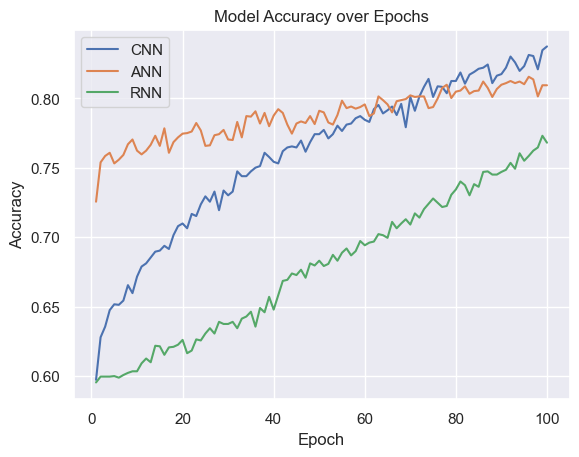

In [22]:

# Plot the accuracy of each model over the number of epochs
plt.plot(range(1, num_epochs+1), cnn_history.history['accuracy'], label='CNN')
plt.plot(range(1, num_epochs+1), ann_history.history['accuracy'], label='ANN')
plt.plot(range(1, num_epochs+1), rnn_history.history['accuracy'], label='RNN')


# Add title, labels, and legend to the plot
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()


Text(0.5, 1.0, 'Precision Scores of Different Models')

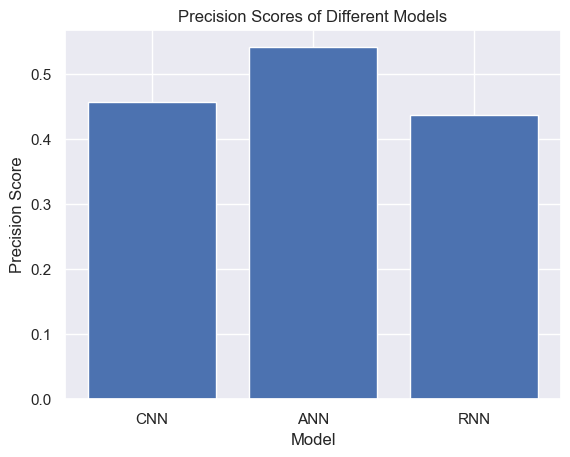

In [23]:
# Plot the precision of each model
fig, ax = plt.subplots()
models = ['CNN', 'ANN', 'RNN']
precision_scores = [cnn_precision, ann_precision, rnn_precision]
ax.bar(models, precision_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Precision Score')
ax.set_title('Precision Scores of Different Models')

Text(0.5, 1.0, 'Recall Scores of Different Models')

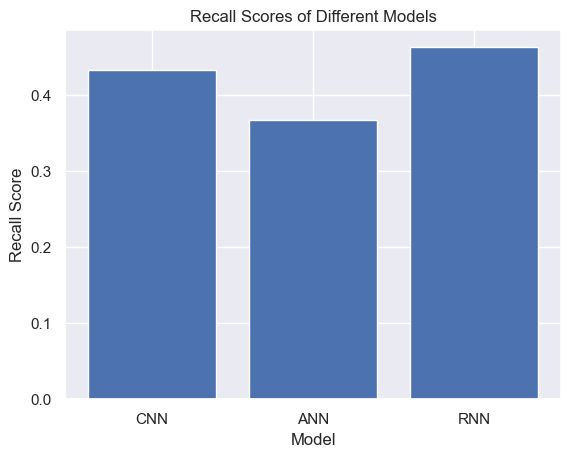

In [24]:
# Plot the recall of each model
fig, ax = plt.subplots()
models = ['CNN', 'ANN', 'RNN']
recall_scores = [cnn_recall, ann_recall, rnn_recall]
ax.bar(models, recall_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Recall Score')
ax.set_title('Recall Scores of Different Models')

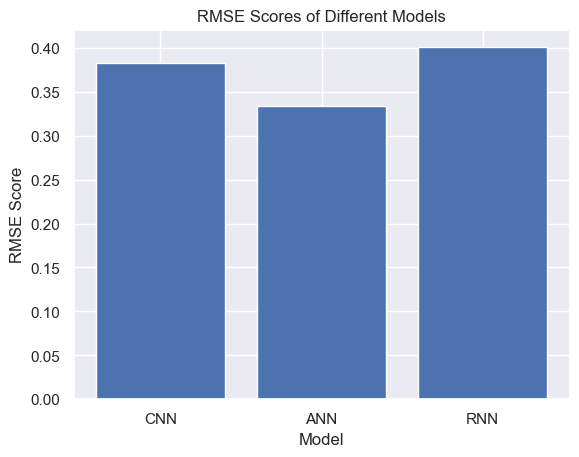

In [25]:
# Plot the RMSE of each model
fig, ax = plt.subplots()
rmse_scores = [cnn_mse, ann_mse, rnn_mse]
ax.bar(models, rmse_scores)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Score')
ax.set_title('RMSE Scores of Different Models')
plt.show()